In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('0_parameters.sh')


In [3]:
devtools::load_all('/oak/stanford/groups/mrivas/users/ytanigaw/repos/yk-tanigawa/cud4')


Loading cud4



In [4]:
file.path(data_d, 'trait_info.tsv') %>%
fread() %>% rename('GBE_category'='#GBE_category') -> trait_info_df


In [5]:
trait_info_df %>% colnames()

[1] "GBE_category"       "GBE_ID"             "N"                 
 [4] "N_GBE"              "N_NBW"              "N_AFR"             
 [7] "N_SAS"              "N_EAS"              "N_SMR"             
[10] "N_OTH"              "N_META"             "GBE_NAME"          
[13] "GBE_short_name"     "GBE_short_name_len"

In [6]:
file.path(data_d, 'snpnet.eval.2_refit.tsv') %>%
fread(colClasses = c('#GBE_ID'='character')) %>%
rename('GBE_ID'='#GBE_ID') %>%
filter(GBE_ID %in% trait_info_df$GBE_ID) %>%
left_join(trait_info_df %>% select(GBE_ID, GBE_category, GBE_short_name), by='GBE_ID') -> eval_df


In [7]:
eval_df %>% filter(split == 'test') %>% dim()

[1] 1772   13

In [8]:
eval_df %>% filter(split == 'test') %>% count(family)

,family,n
,<chr>,<int>
1,binomial,742
2,gaussian,1030


In [16]:
eval_df %>% 
filter(split == 'test', family == 'binomial') %>% count(GBE_category) %>% arrange(-n)

GBE_category,n
<chr>,<int>
Disease_outcome,457
Health_and_medical_history,84
Lifestyle_and_environment,49
Mental_health,41
cancer,19
Psychosocial_factors,18
Blood_assays,14
Diet_by_24-hour_recall,12
Family_history,11


In [12]:
eval_df %>% filter(split == 'test', geno_delta>0) %>% dim()

[1] 1351   13

In [14]:
eval_df %>% filter(split == 'test', geno_delta>0.005) %>% dim()

[1] 793  13

In [15]:
eval_df %>% filter(split == 'test', geno_delta>0.005) %>% count(GBE_category) %>% arrange(-n)

GBE_category,n
<chr>,<int>
Diffusion_brain_MRI,182
Disease_outcome,165
T1_structural_brain_MRI,100
Blood_assays,70
Lifestyle_and_environment,50
Health_and_medical_history,40
Anthropometry,38
Biomarkers,32
Bone-densitometry_of_heel,23


In [23]:
eval_df %>% filter(
    split == 'test', geno_delta>0.005
) %>% select(n_variables) %>%
summary()

  n_variables   
 Min.   :    1  
 1st Qu.:  442  
 Median : 1316  
 Mean   : 4654  
 3rd Qu.: 5701  
 Max.   :51209  

In [24]:
eval_df %>% filter(
    split == 'test', geno_delta>0.005, family == 'gaussian'
) %>% select(n_variables) %>%
summary()

  n_variables     
 Min.   :    5.0  
 1st Qu.:  816.2  
 Median : 1743.0  
 Mean   : 6147.2  
 3rd Qu.: 9009.5  
 Max.   :51209.0  

In [25]:
eval_df %>% filter(
    split == 'test', geno_delta>0.005, family != 'gaussian'
) %>% select(n_variables) %>%
summary()

  n_variables   
 Min.   :    1  
 1st Qu.:   32  
 Median :  323  
 Mean   : 1810  
 3rd Qu.: 2524  
 Max.   :14076  

In [22]:
eval_df %>% filter(
    split == 'test', geno_delta>0.005, GBE_category == 'Disease_outcome'
) %>% select(n_variables) %>%
summary()

  n_variables   
 Min.   :    1  
 1st Qu.:   17  
 Median :  121  
 Mean   : 1043  
 3rd Qu.:  839  
 Max.   :13791  

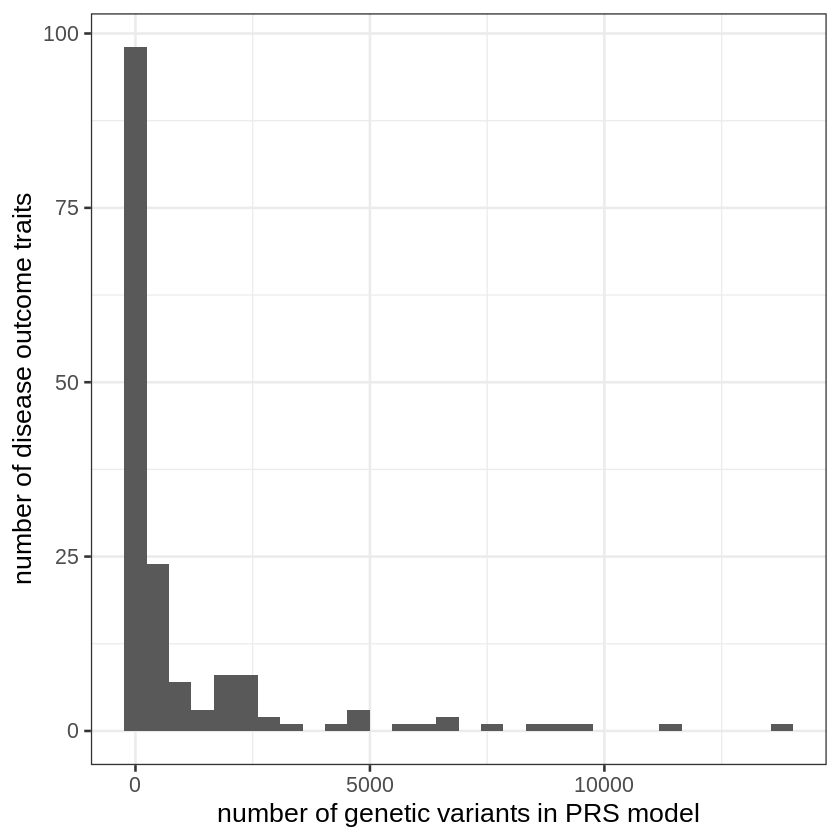

In [19]:
eval_df %>% filter(
    split == 'test', geno_delta>0.005, GBE_category == 'Disease_outcome'
) %>%
ggplot(aes(x = n_variables)) +
geom_histogram(bins=30) + theme_bw(base_size = 16) + 
labs(
    x = 'number of genetic variants in PRS model',
    y = 'number of disease outcome traits'
)


## Predictive performance vs. model size plot

- x-axis: log10(number of variants in the PRS model), 
- y-axis: the delta in predictive performance (do color coding by gaussian, binomial, etc family)


In [124]:
eval_df %>%
filter(split == 'test', family == 'binomial') %>%
ggplot(aes(x  = n_variables, y = geno_delta)) +
geom_point() + scale_x_continuous(trans='log10') +
theme_bw(base_size = 16) + labs(
    title = 'Binomial models', x = 'Number of genetic variants', y = 'Incremental AUC'
) -> p_geno_delta_vs_size_binomial


In [125]:
eval_df %>%
filter(split == 'test', family == 'gaussian') %>%
ggplot(aes(x  = n_variables, y = geno_delta)) +
geom_point() + scale_x_continuous(trans='log10') +
theme_bw(base_size = 16) + labs(
    title = 'Gaussian models', x = 'Number of genetic variants', y = latex2exp::TeX('Incremental r^2') 
) -> p_geno_delta_vs_size_gaussian


In [126]:
for(ext in c('png', 'pdf')){ggsave(
    sprintf('%s.%s', 'test_set_performance_vs_size', ext),
    gridExtra::arrangeGrob(p_geno_delta_vs_size_binomial, p_geno_delta_vs_size_gaussian, ncol=2),
    width=16, height=8
)}


## Trans-ethnic transferability

Violin plot for fraction performance in each population split relative to test split performance in WB
(so you’d have non-british white, s-asian, e-asian, african)

In [103]:
eval_df %>% filter(split != 'train_val') %>% filter(geno_delta > 0.05) %>%
select(GBE_ID, geno_delta, split) %>%
spread(split, geno_delta) %>% mutate(
    non_british_white = non_british_white / test,
    african           = african / test,
    s_asian           = s_asian / test,
    e_asian           = e_asian / test
) %>% select(-test) %>%
gather(split, geno_delta_relative, -GBE_ID) %>% drop_na() %>%
left_join(data.frame(
    split = c('non_british_white', 's_asian', 'e_asian', 'african'),
    split_plot = c('Non-British white', 'South Asian', 'East Asian', 'African'),
    split_order=1:4, stringAsFactors=F
), by='split') %>%
ggplot(aes(x=reorder(split_plot, split_order), y=geno_delta_relative)) + 
geom_violin() + theme_bw(base_size = 16) + labs(
    title = 'Trans-ethnic predictive performance',
    x = 'Ancestry group in UK Biobank',
    y = latex2exp::TeX('Incremental predictive performance relative to WB') 
) -> p_trans_ethnic


In [104]:
eval_df %>% filter(split != 'train_val') %>%
select(GBE_ID, geno_delta, split) %>%
spread(split, geno_delta) %>% mutate(
    non_british_white = non_british_white / test,
    african           = african / test,
    s_asian           = s_asian / test,
    e_asian           = e_asian / test
) %>% select(-test) %>%
gather(split, geno_delta_relative, -GBE_ID) %>% drop_na() %>%
left_join(data.frame(
    split = c('non_british_white', 's_asian', 'e_asian', 'african'),
    split_plot = c('Non-British white', 'South Asian', 'East Asian', 'African'),
    split_order=1:4, stringAsFactors=F
), by='split') %>%
ggplot(aes(x=reorder(split_plot, split_order), y=geno_delta_relative)) + 
geom_violin() + theme_bw(base_size = 16) + labs(
    title = 'Trans-ethnic predictive performance',
    x = 'Ancestry group in UK Biobank',
    y = latex2exp::TeX('Incremental predictive performance relative to WB') 
) -> p_trans_ethnic_full


In [121]:
eval_df %>% filter(split != 'train_val') %>%
select(GBE_ID, geno_delta, split) %>%
spread(split, geno_delta) %>% 
gather(split, geno_delta, -GBE_ID, -test) %>% drop_na() %>%
left_join(data.frame(
    split = c('non_british_white', 's_asian', 'e_asian', 'african'),
    split_plot = c('Non-British white', 'South Asian', 'East Asian', 'African')
), by='split') %>%
ggplot(aes(x = test, y = geno_delta, color=split_plot)) +
geom_point(alpha = .5) + theme_bw(base_size = 16) + labs(
    title = 'Trans-ethnic predictive performance',
    x = 'Incremental predictive performance in WB',
    y = latex2exp::TeX('Trans-ethnic incremental predictive performance'),
    color = 'Ancestry group in UK Biobank'
) + theme(legend.position = c(.3, .85)) +
scale_color_manual(values=setNames(
    c(cud4_colors()['gray'], cud4_colors()['green'], cud4_colors()['sky_blue'], cud4_colors()['red'] ),
    c('Non-British white', 'South Asian', 'East Asian', 'African')
)) -> p_trans_ethnic_scatter


In [105]:
for(ext in c('png', 'pdf')){ggsave(
    sprintf('%s.%s', 'trans_ethnic_violin', ext),
    p_trans_ethnic,
    width=8, height=8
)}


In [106]:
for(ext in c('png', 'pdf')){ggsave(
    sprintf('%s.%s', 'trans_ethnic_full_violin', ext),
    p_trans_ethnic_full,
    width=8, height=8
)}


In [122]:
for(ext in c('png', 'pdf')){ggsave(
    sprintf('%s.%s', 'trans_ethnic_scatter', ext),
    p_trans_ethnic_scatter,
    width=8, height=8
)}


## Predictive performance

- histogram of the delta performance across the traits (maybe split for binary and gaussian)


In [128]:
eval_df %>%
filter(split == 'test', family == 'binomial') %>%
ggplot(aes(x = geno_delta)) +
geom_histogram(bins=30) + theme_bw(base_size = 16) + labs(
    title = 'Binomial models', x = 'Incremental AUC'
) -> p_geno_delta_binomial


In [130]:
eval_df %>%
filter(split == 'test', family == 'gaussian') %>%
ggplot(aes(x = geno_delta)) +
geom_histogram(bins=30) + theme_bw(base_size = 16) + labs(
    title = 'Gaussian models', x = 'Number of genetic variants', y = latex2exp::TeX('Incremental r^2') 
) -> p_geno_delta_gaussian


In [132]:
for(ext in c('png', 'pdf')){ggsave(
    sprintf('%s.%s', 'test_set_performance', ext),
    gridExtra::arrangeGrob(p_geno_delta_binomial, p_geno_delta_gaussian, ncol=2),
    width=16, height=8
)}
